In [71]:
import cv2
import numpy as np
from glob import glob
import os
import matplotlib.pyplot as plt
import pydicom
from pydicom.dataset import Dataset, FileDataset
import pydicom.uid
import skimage as ski
import skimage.io
import skimage.transform
import skimage.draw
import skimage.morphology
import io
import array
import sys

In [65]:
def ReadDicomFrame(_filename, _frameId):
	# print(_filename + " " + str(_frameId))
	file = open(_filename, "rb") # TODO use OpenFile here?
	dcmInfo = pydicom.read_file(file, stop_before_pixels = True, defer_size = 16)
	if _frameId < 0 and _frameId >= dcmInfo.NumberOfFrames:
		print("ReadDicomFrame():: ERROR _frameId should be inferior dcmInfo.NumberOfFrames")
		
	# print(dcmInfo.BitsStored)
	if dcmInfo.BitsStored == 16 or dcmInfo.BitsStored == 10:
		pixelType = "H"
		pixelSize = 2 # dcmInfo.BitsStored//8
	elif dcmInfo.BitsStored == 8:
		pixelType = "B"
		pixelSize = 1
	else:
		print("ReadDicomFrame():: WARNING NOT IMPLEMENTED dcmInfo.BitsStored = " + str(dcmInfo.BitsStored))
		
	sizeImageInByte = dcmInfo.Columns*dcmInfo.Rows*pixelSize
	# print(sizeImageInByte)
	
	# print(file.tell())
	# skip the dicom tag (0x7fe0, 0x0010) 4 bytes,
	# then the VR info if we have "explicit VR" (if not, nothing is there in "implicit VR") 4 bytes (if not 0 byte): (VR_OW = 0x574f for example)
	# finally the length of the sequence 4 bytes
	# u16 = struct.unpack('H', file.read(2))[0]
	# print(hex(u16) + " " + str(u16))
	# u16 = struct.unpack('H', file.read(2))[0]
	# print(hex(u16) + " " + str(u16))
	# if dcmInfo.is_implicit_VR == False:
		# s32 = struct.unpack('i', file.read(4))[0]
		# print(hex(s32) + " " + str(s32))
	# s32 = struct.unpack('i', file.read(4))[0]
	# print(hex(s32) + " " + str(s32))
	if dcmInfo.is_implicit_VR == True:
		file.seek(8, io.SEEK_CUR)
	else:
		file.seek(12, io.SEEK_CUR)
	file.seek(_frameId*sizeImageInByte, io.SEEK_CUR)
	package = file.read(sizeImageInByte)
	# print(len(package))
	
	# seems faster than...
	image = array.array(pixelType)
	if sys.version_info < (3,0):
		image.fromstring(package) # DEPRECATED
	else:
		image.frombytes(package)
	# ...this
	# n = dcmInfo.Columns*dcmInfo.Rows
	# image = struct.unpack(str(n)+pixelType, package)
	
	# image = np.array(image).reshape(dcmInfo.Columns, dcmInfo.Rows)
	# print(sizeImageInByte)
	# print(np.array(image).shape)
	# print(np.array(image).dtype)
	image = np.array(image).reshape(dcmInfo.Rows, dcmInfo.Columns)
	
	file.close() # TODO use CloseFile here?
	return image, dcmInfo

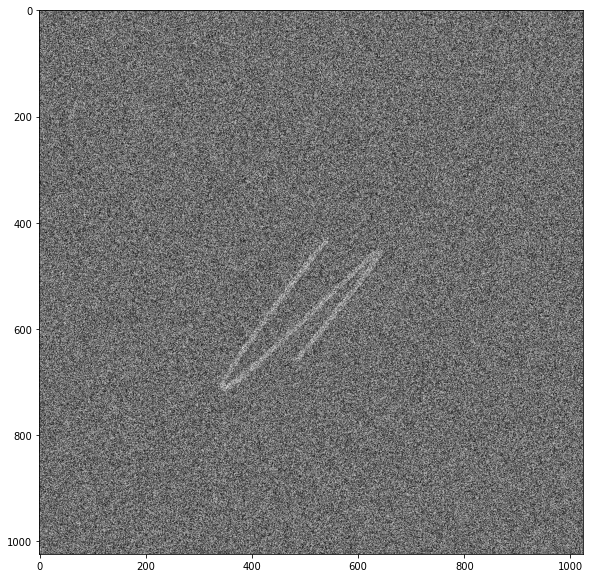

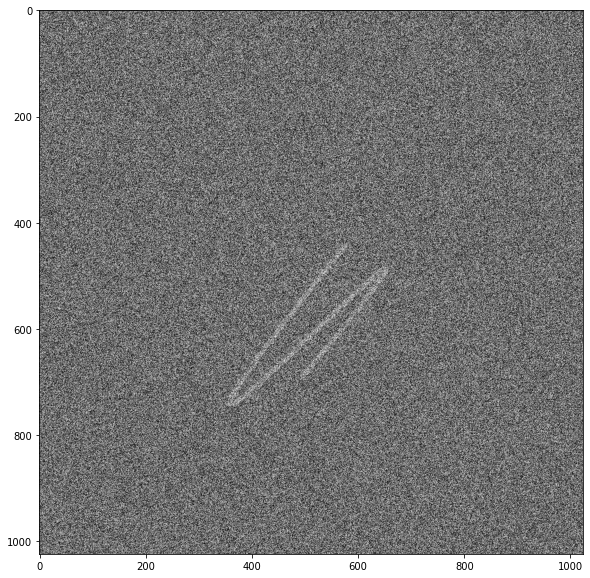

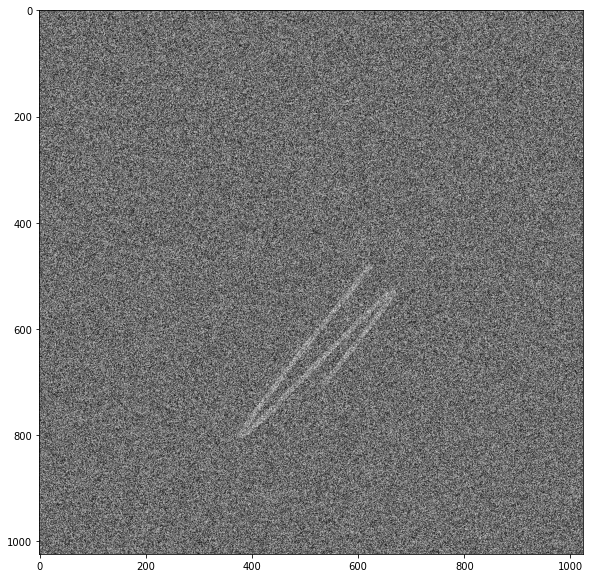

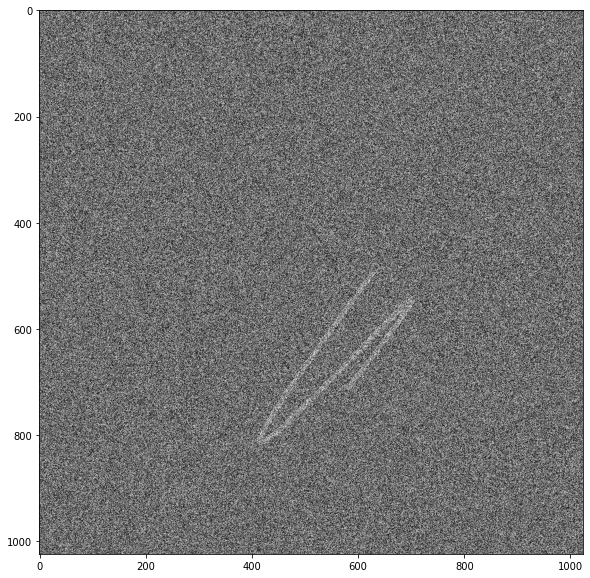

In [75]:
dcm_imgs = []
for i in range(4):
    img, info = ReadDicomFrame(dcms[0], i)
    dcm_imgs.append(img)
    plt.figure(figsize=(10,10))
    plt.imshow(img, cmap='gray')
    plt.show()

In [30]:
root = 'examples/generateTrainTestDataset'
clines = glob(os.path.join(root, '**/*.txt'), recursive=True)
clines.sort()
dcms = glob(os.path.join(root, '**/*.dcm'), recursive=True)
dcms.sort()

In [31]:
dcms

['examples/generateTrainTestDataset/generated/sequence0000.dcm',
 'examples/generateTrainTestDataset/generated/sequence0001.dcm',
 'examples/generateTrainTestDataset/generated/sequence0002.dcm',
 'examples/generateTrainTestDataset/generated/sequence0003.dcm',
 'examples/generateTrainTestDataset/generated/sequence0004.dcm',
 'examples/generateTrainTestDataset/generated/sequence0005.dcm',
 'examples/generateTrainTestDataset/generated/sequence0006.dcm',
 'examples/generateTrainTestDataset/generated/sequence0007.dcm',
 'examples/generateTrainTestDataset/generated/sequence0008.dcm',
 'examples/generateTrainTestDataset/generated/sequence0009.dcm',
 'examples/generateTrainTestDataset/generated/sequence0010.dcm',
 'examples/generateTrainTestDataset/generated/sequence0011.dcm',
 'examples/generateTrainTestDataset/generated/sequence0012.dcm',
 'examples/generateTrainTestDataset/generated/sequence0013.dcm',
 'examples/generateTrainTestDataset/generated/sequence0014.dcm',
 'examples/generateTrainT

In [32]:
i = 0
dcm_data = pydicom.dcmread(dcms[i])

In [50]:
dcm_data

Dataset.file_meta -------------------------------
(0002, 0002) Media Storage SOP Class UID         UI: 1.2.3.4.5.1.4.1.1.2
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.3
(0002, 0012) Implementation Class UID            UI: 1.2.3.4
-------------------------------------------------
(0028, 0002) Samples per Pixel                   US: 1
(0028, 0004) Photometric Interpretation          CS: 'MONOCHROME2'
(0028, 0008) Number of Frames                    IS: '4'
(0028, 0010) Rows                                US: 1024
(0028, 0011) Columns                             US: 1024
(0028, 0100) Bits Allocated                      US: 16
(0028, 0101) Bits Stored                         US: 16
(0028, 0102) High Bit                            US: 15
(0028, 0103) Pixel Representation                US: 0
(0028, 0106) Smallest Image Pixel Value          US: 0
(0028, 0107) Largest Image Pixel Value           US: 65535
(7fe0, 0010) Pixel Data                          OW: Array of 8388608 eleme

In [43]:
dcm_imgs = dcm_data.PixelData

In [62]:
len(dcm_imgs)

8388608

In [63]:
dcm_imgs[8388607]

214

In [7]:
clines

['examples/generateTrainTestDataset/generated/sequence0000centerline0000.txt',
 'examples/generateTrainTestDataset/generated/sequence0000centerline0001.txt',
 'examples/generateTrainTestDataset/generated/sequence0000centerline0002.txt',
 'examples/generateTrainTestDataset/generated/sequence0000centerline0003.txt',
 'examples/generateTrainTestDataset/generated/sequence0001centerline0000.txt',
 'examples/generateTrainTestDataset/generated/sequence0001centerline0001.txt',
 'examples/generateTrainTestDataset/generated/sequence0001centerline0002.txt',
 'examples/generateTrainTestDataset/generated/sequence0001centerline0003.txt',
 'examples/generateTrainTestDataset/generated/sequence0002centerline0000.txt',
 'examples/generateTrainTestDataset/generated/sequence0002centerline0001.txt',
 'examples/generateTrainTestDataset/generated/sequence0002centerline0002.txt',
 'examples/generateTrainTestDataset/generated/sequence0002centerline0003.txt',
 'examples/generateTrainTestDataset/generated/sequen

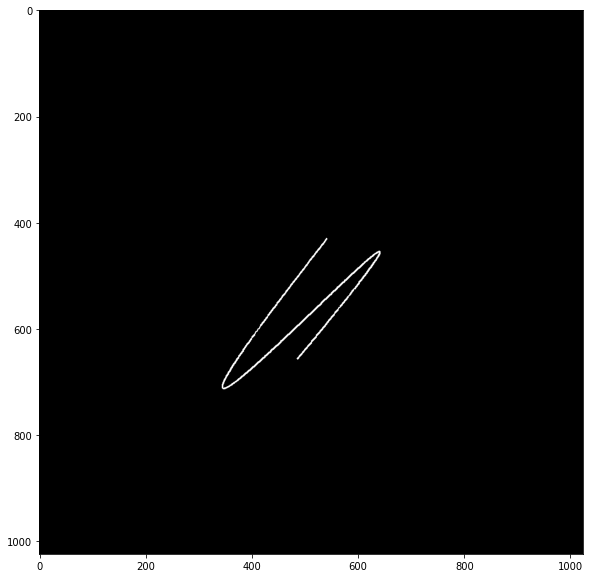

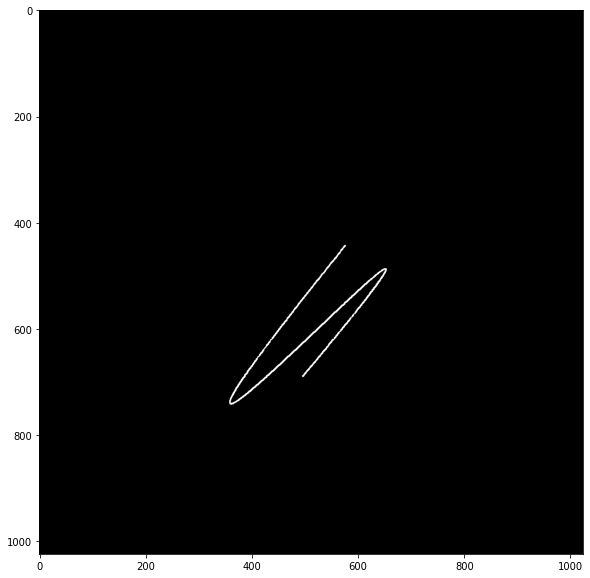

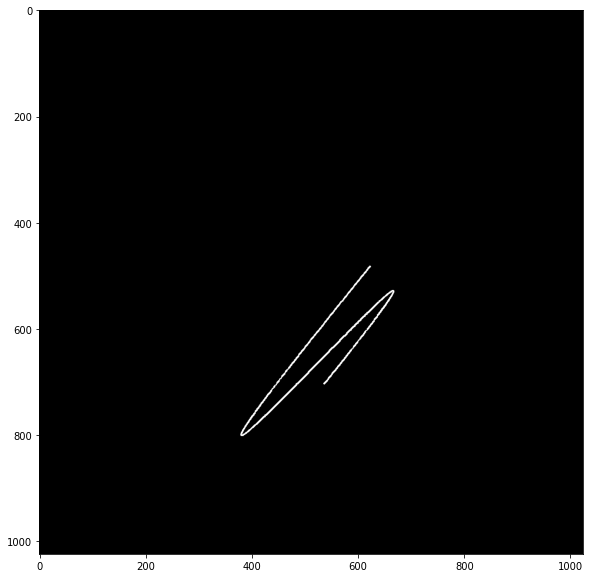

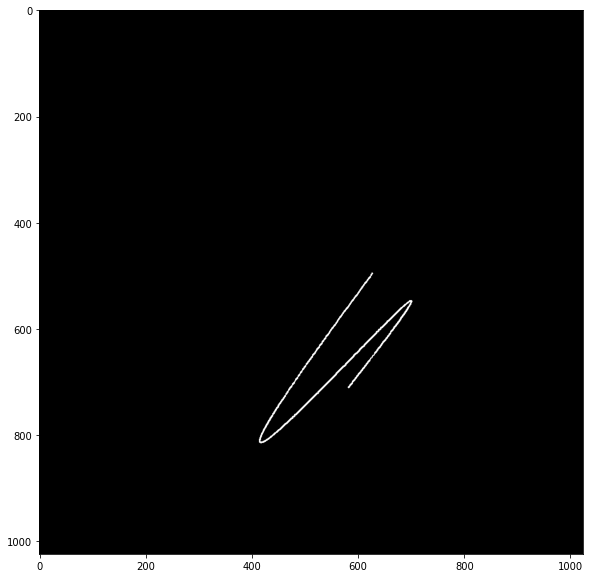

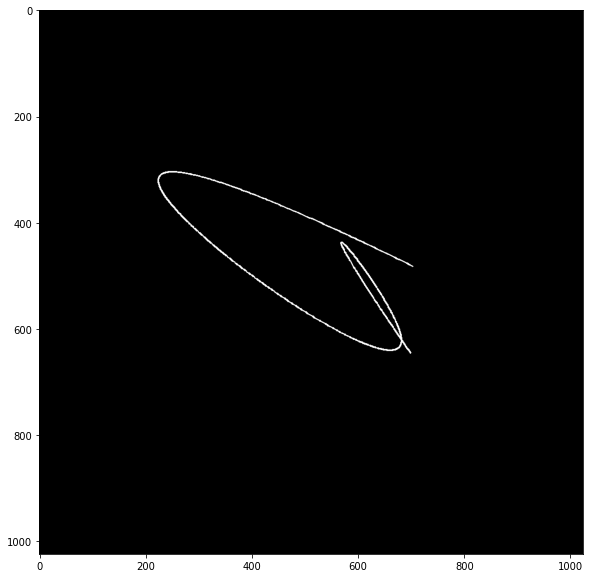

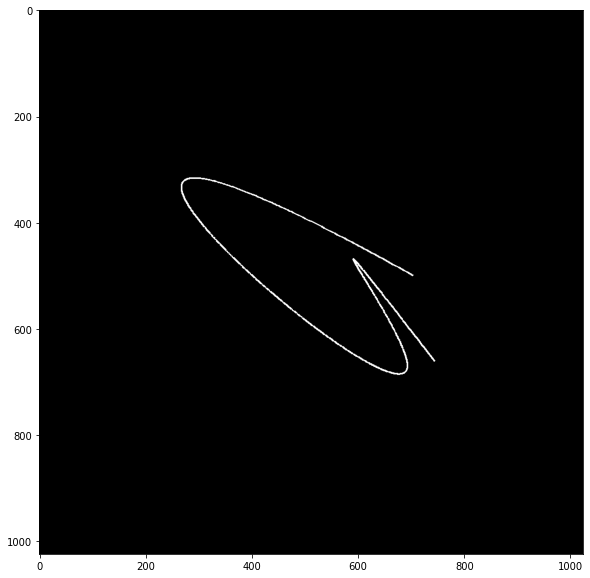

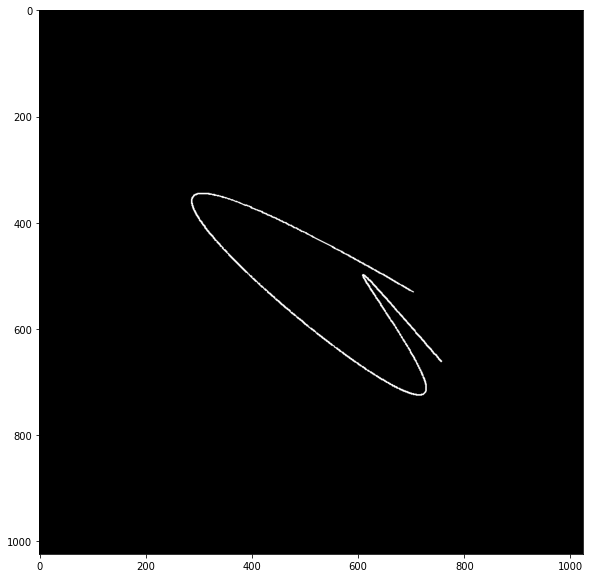

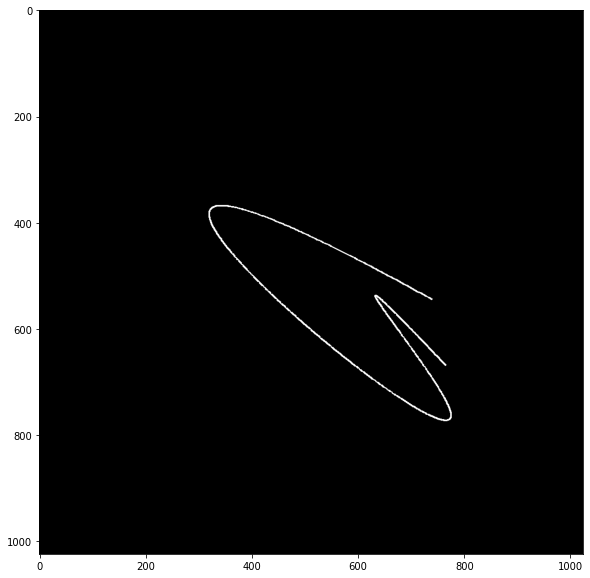

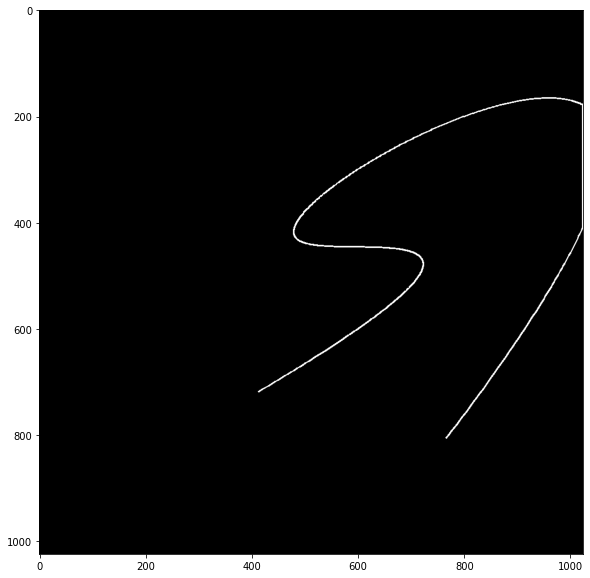

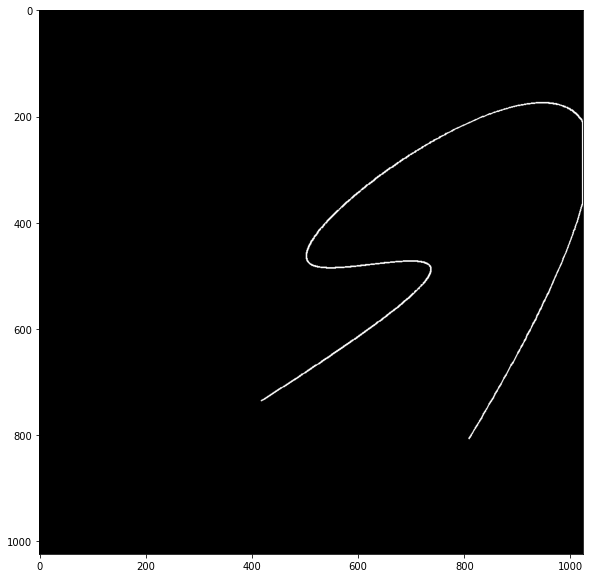

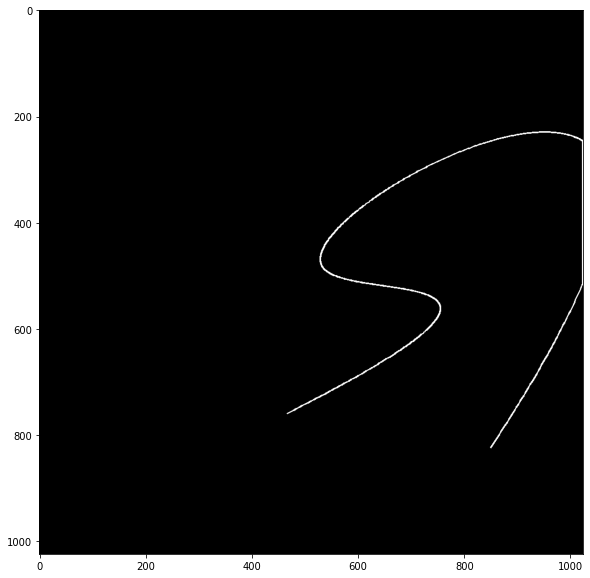

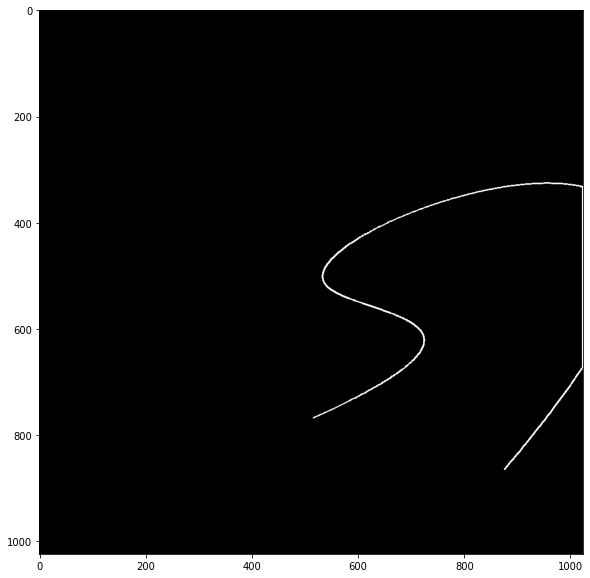

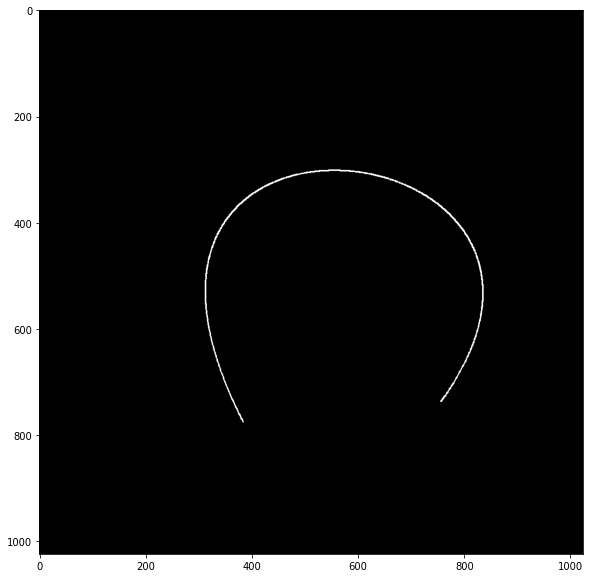

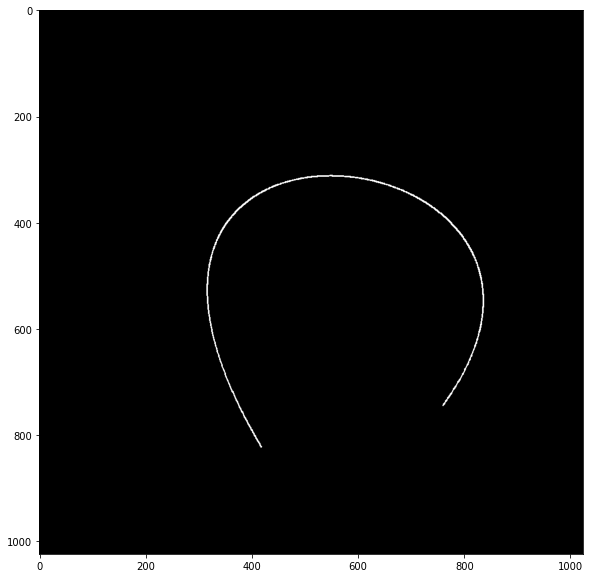

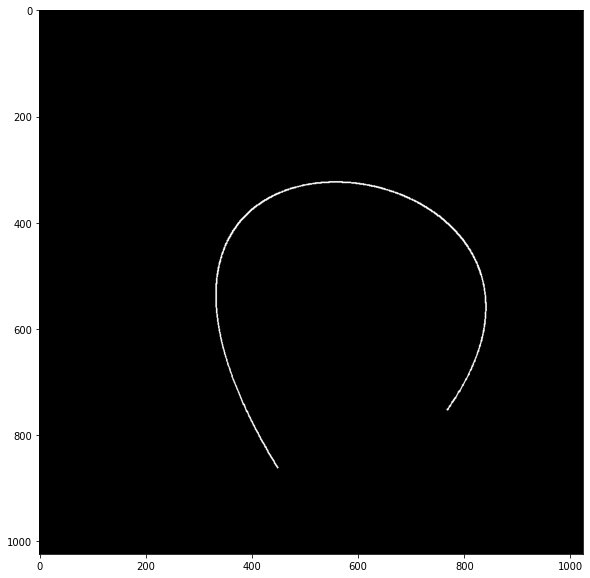

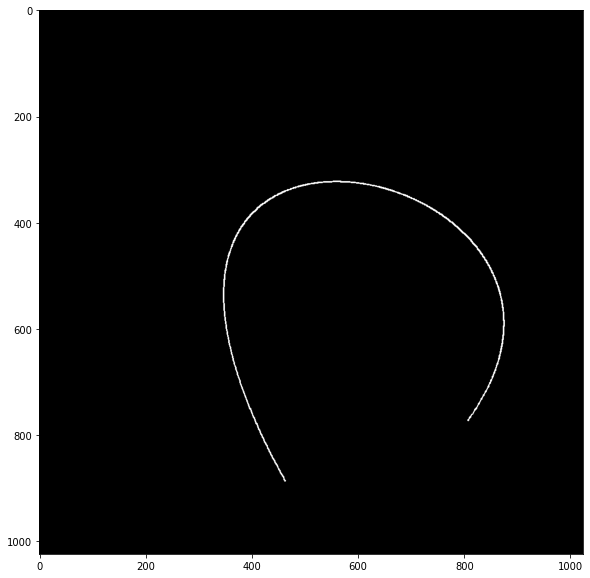

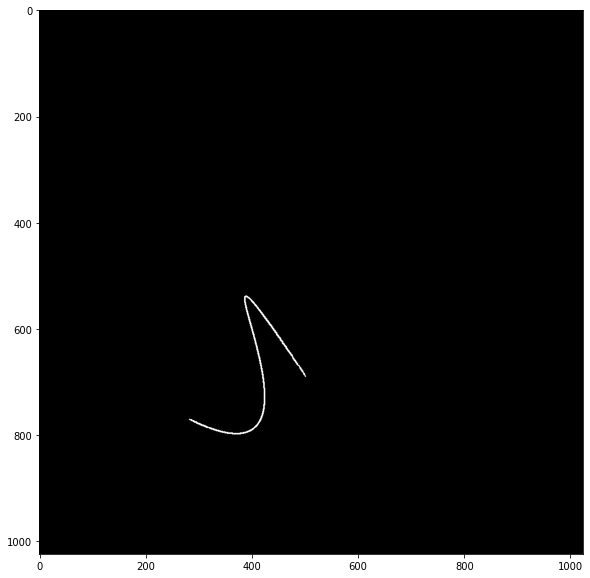

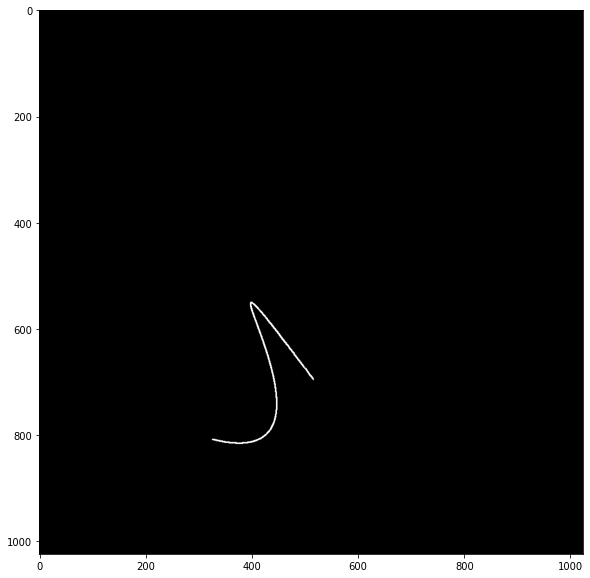

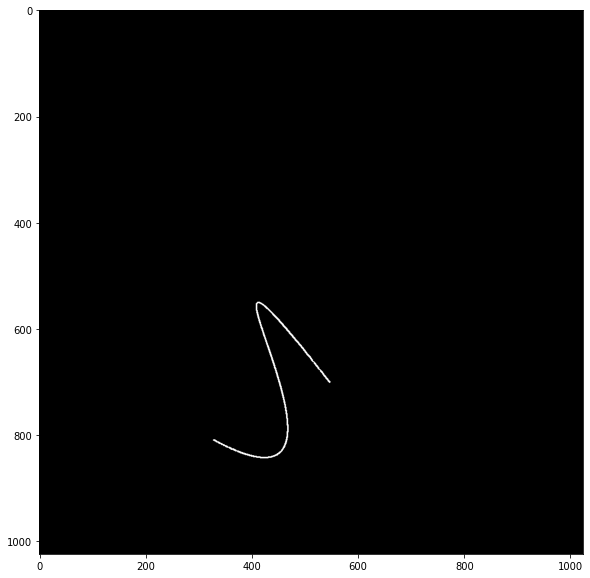

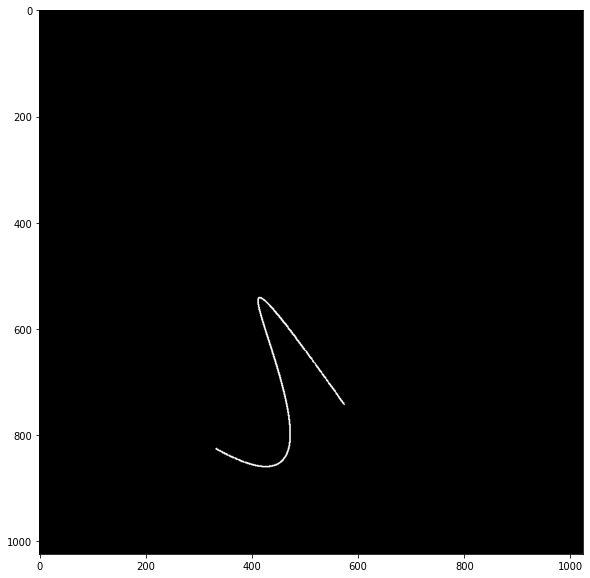

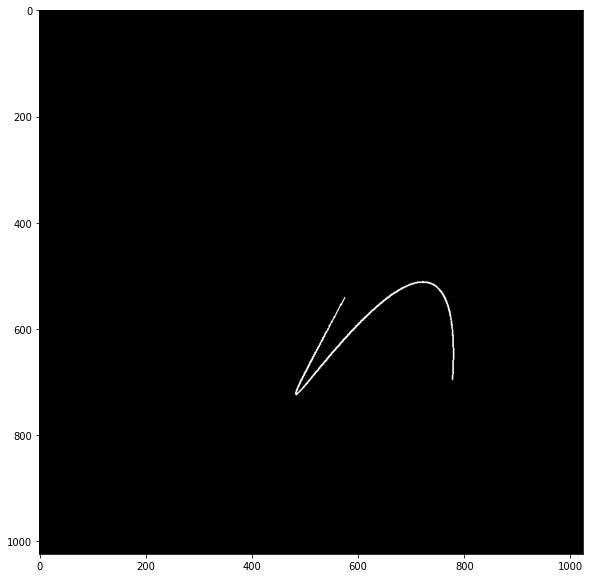

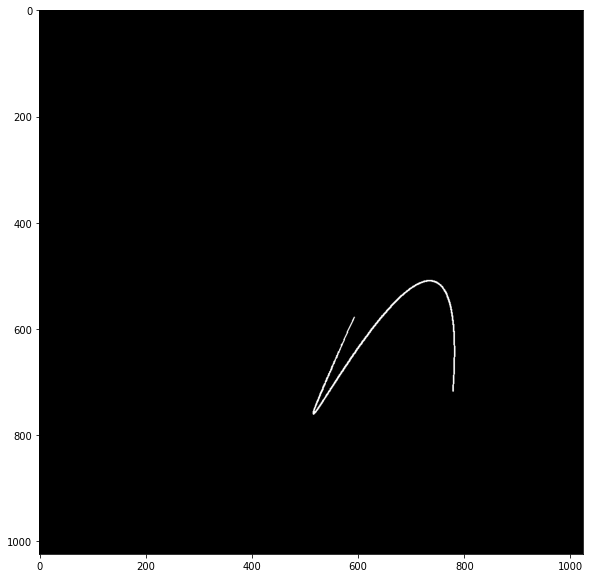

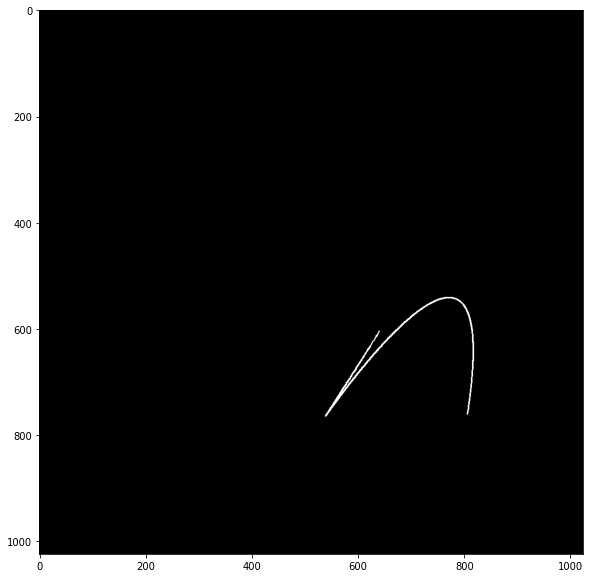

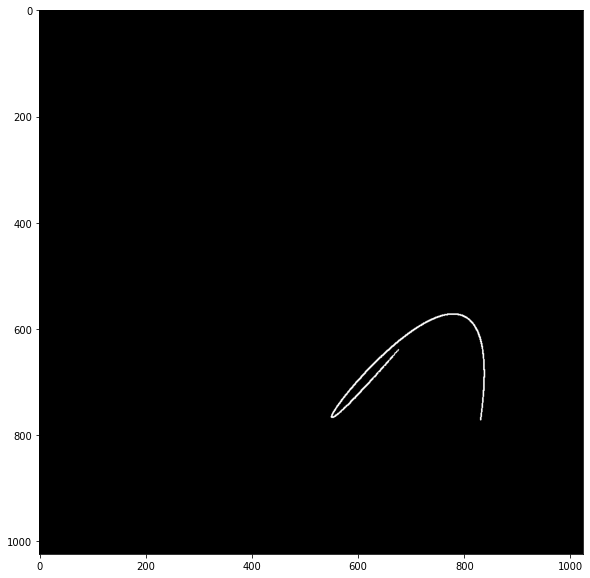

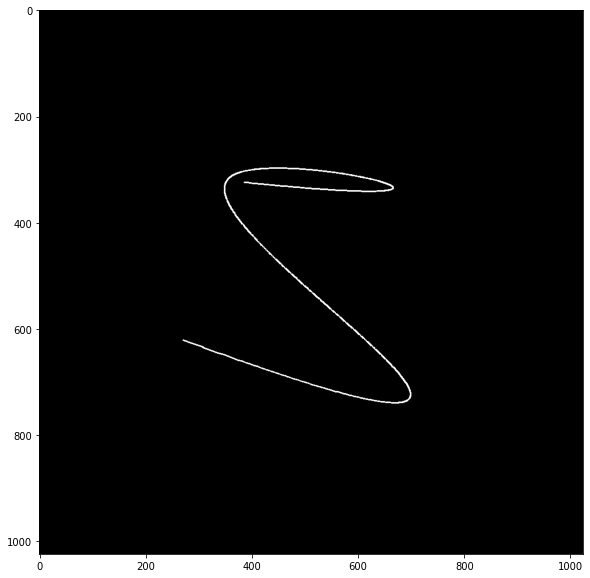

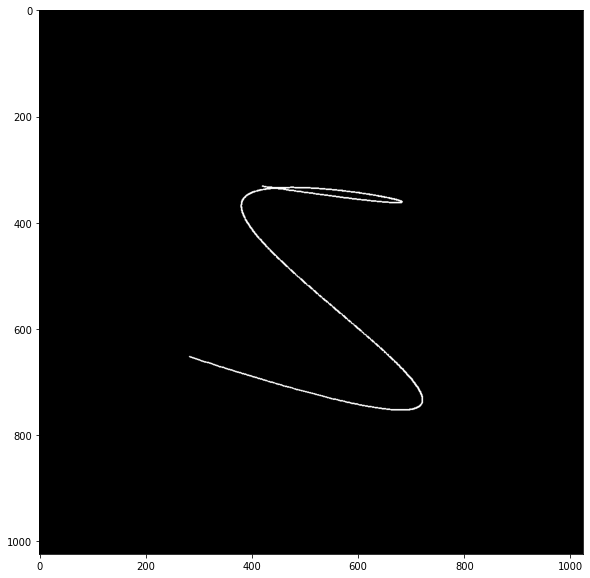

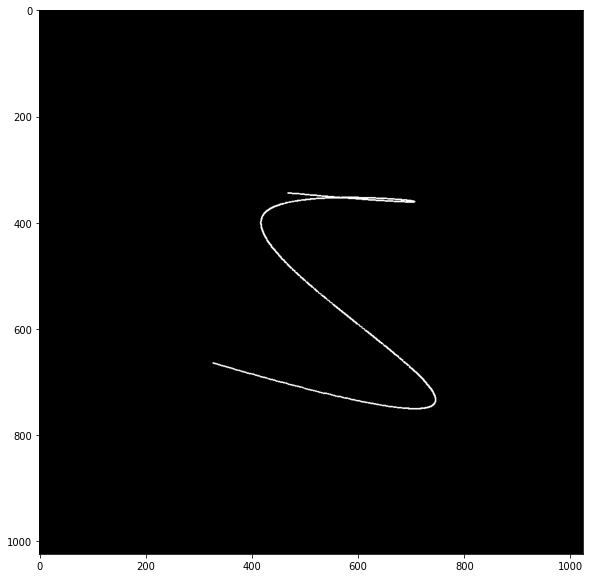

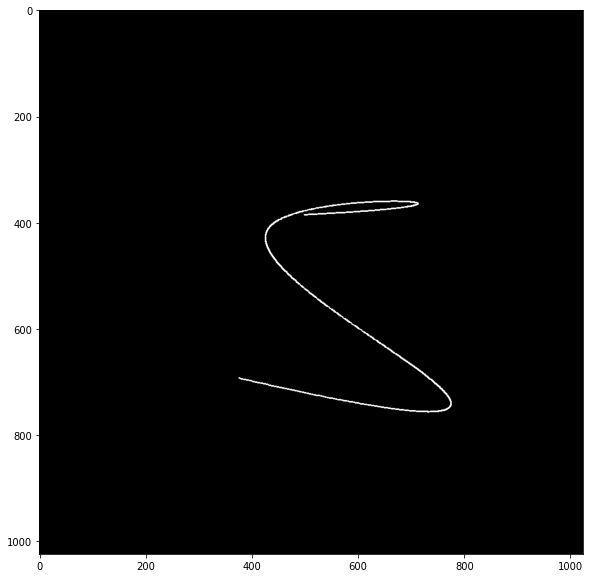

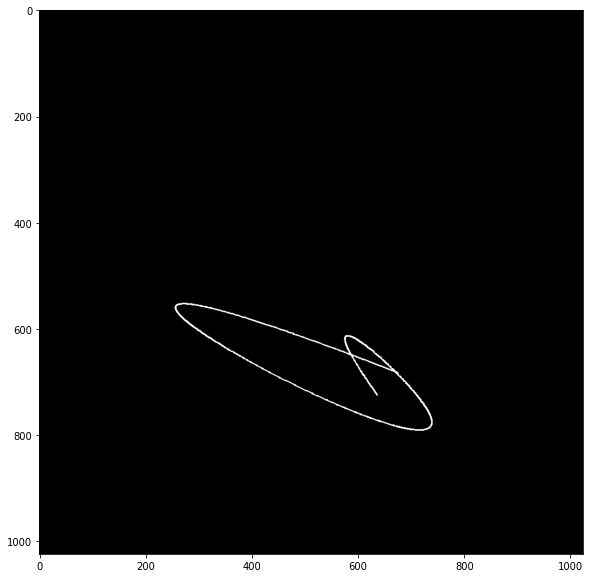

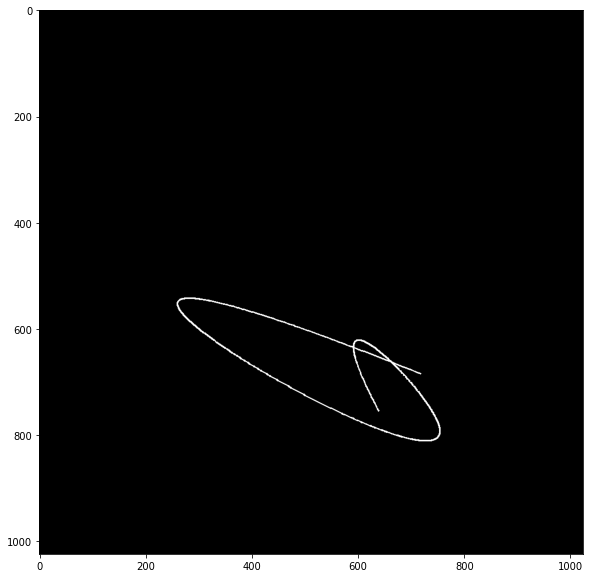

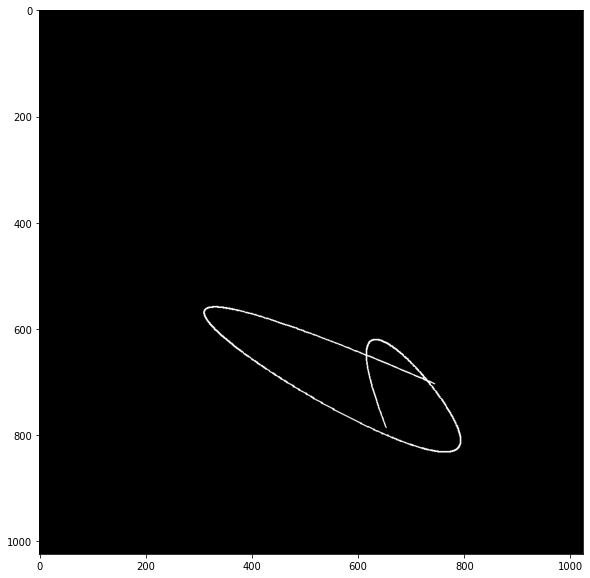

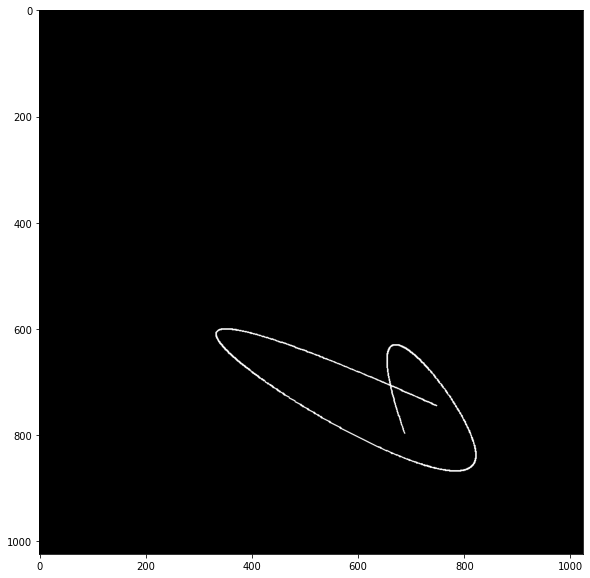

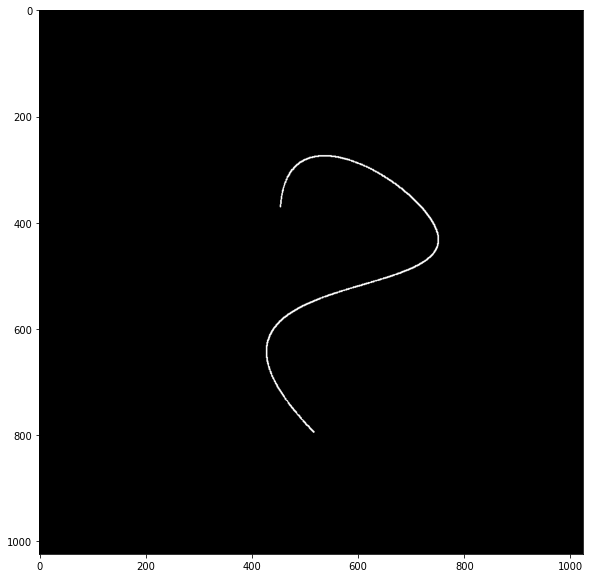

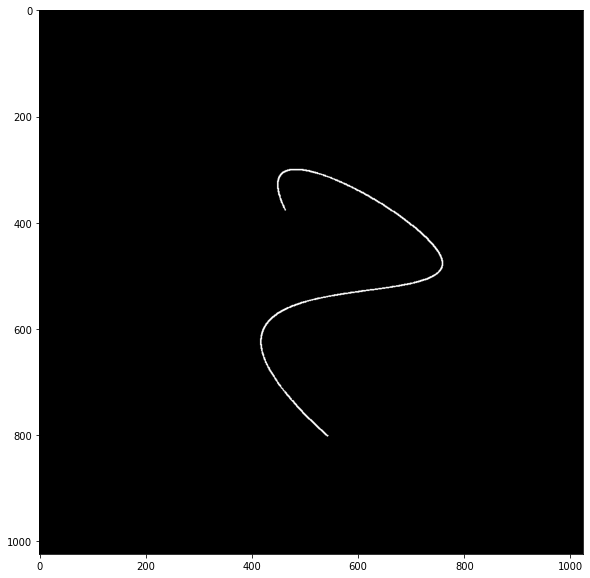

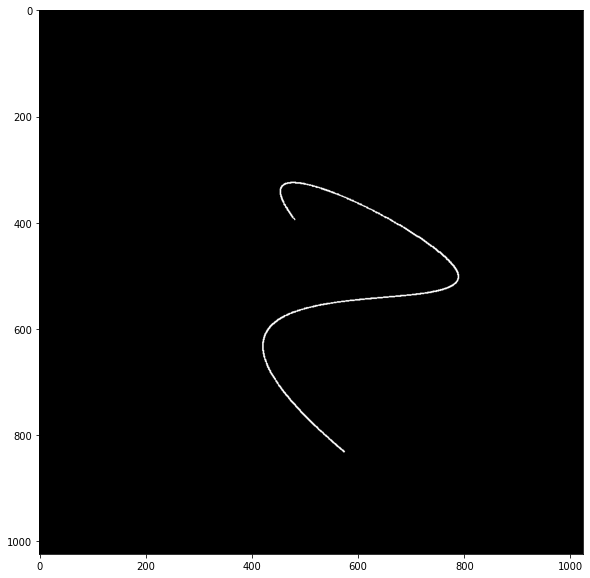

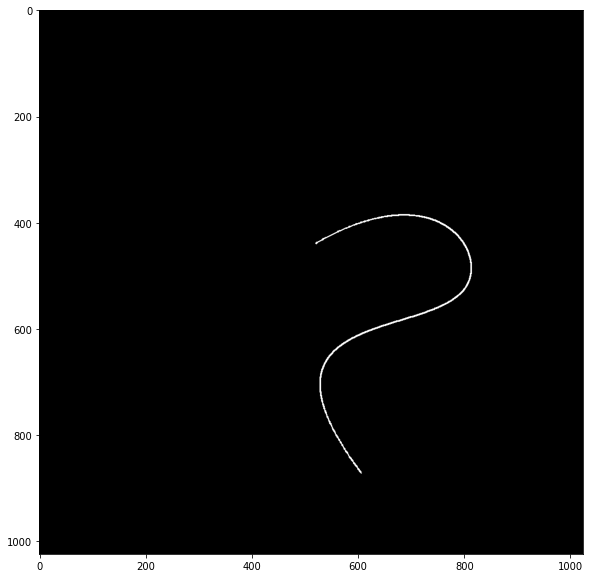

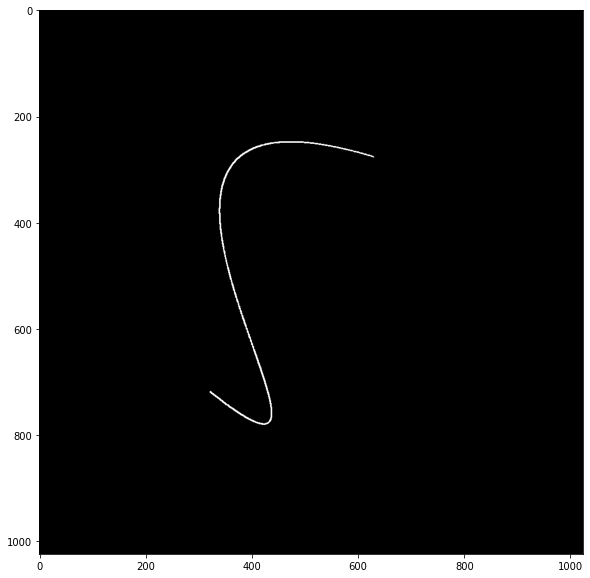

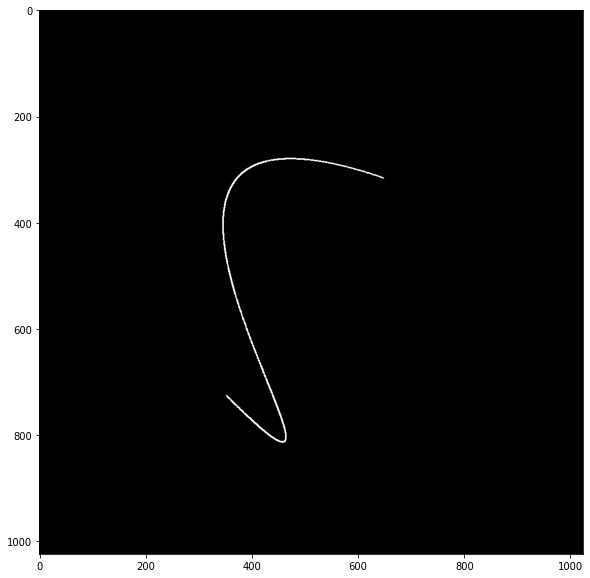

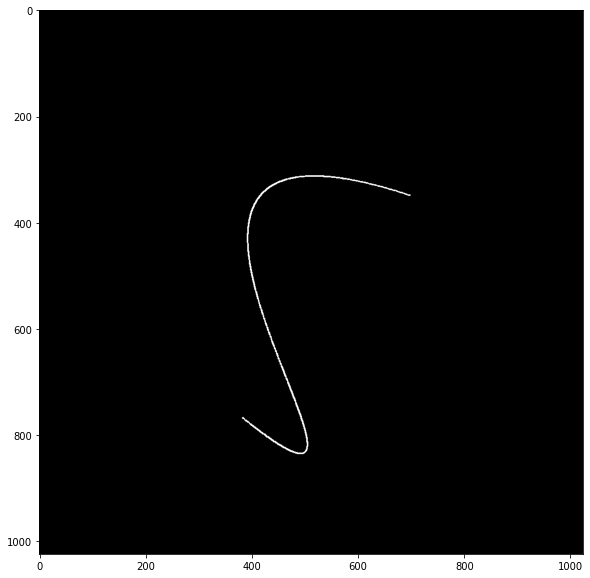

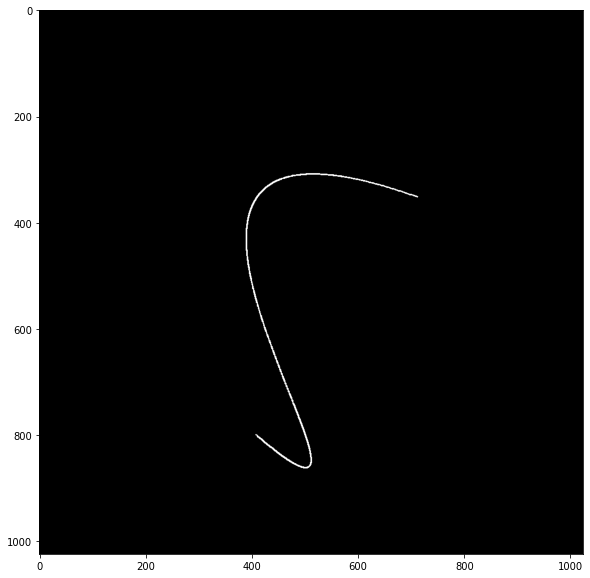

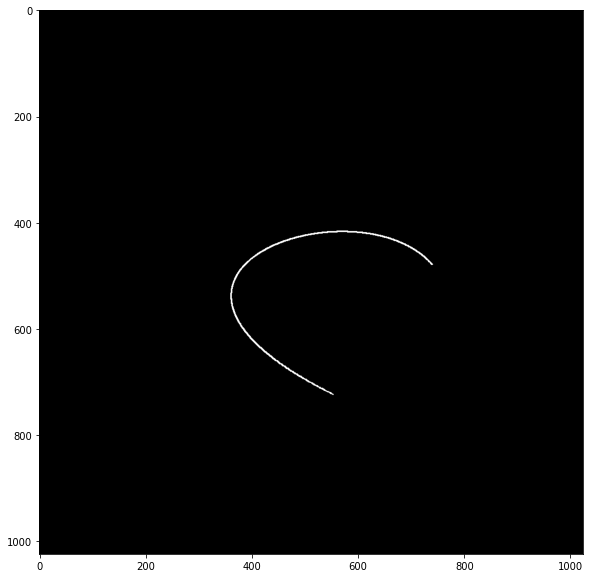

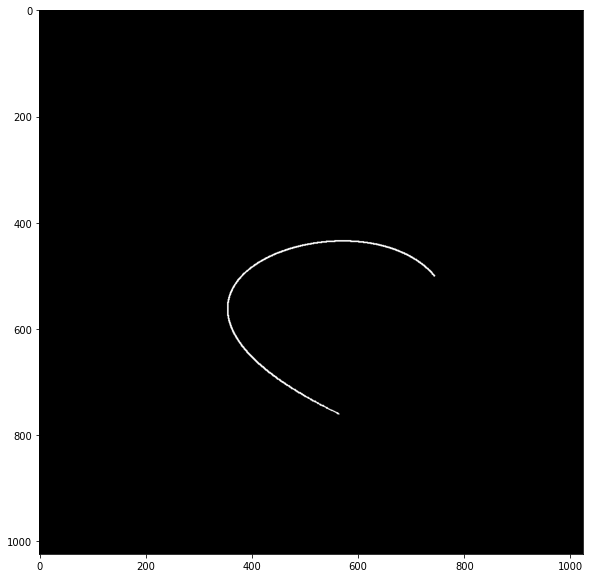

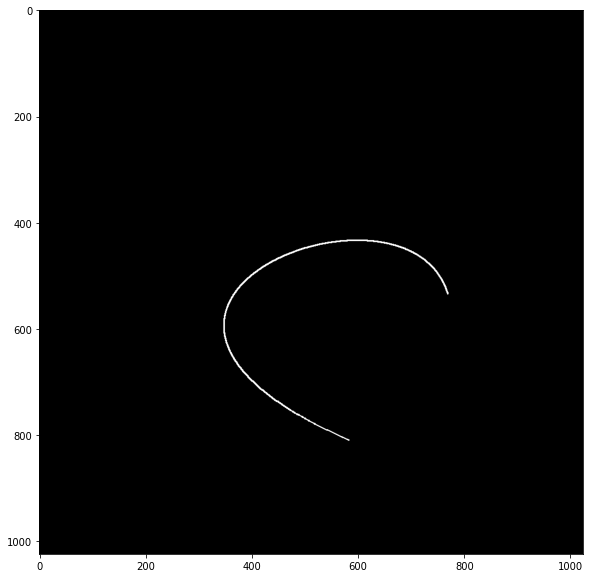

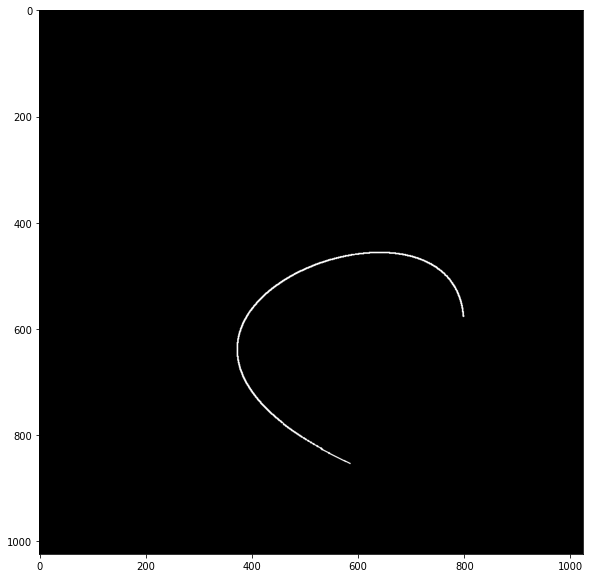

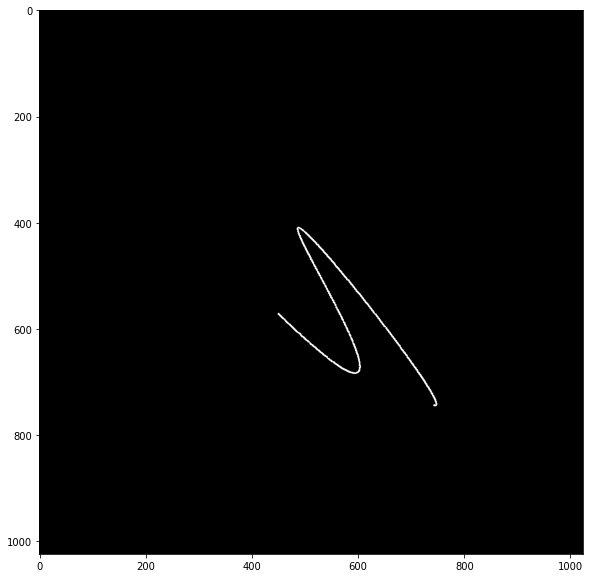

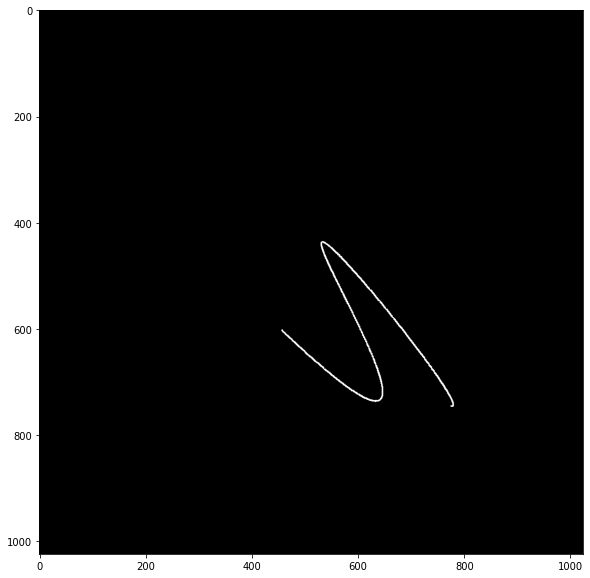

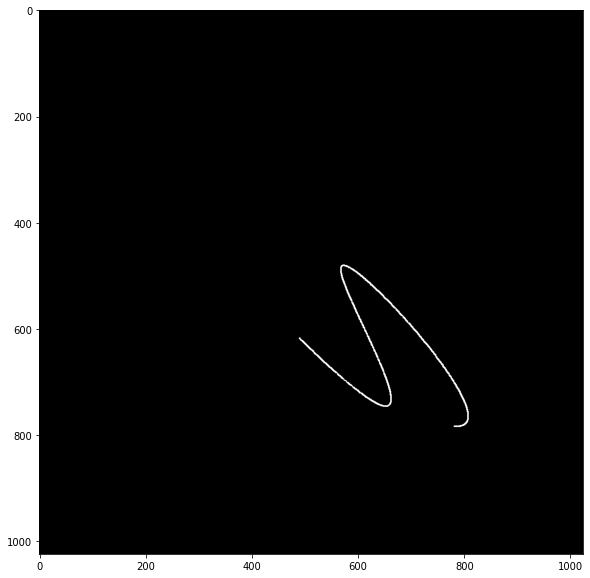

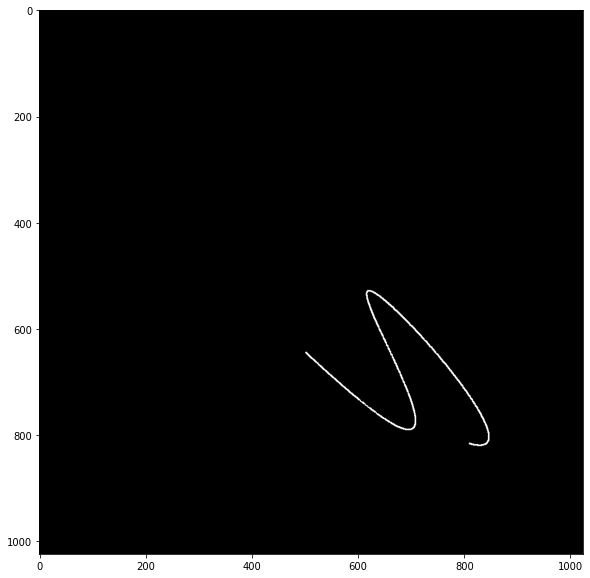

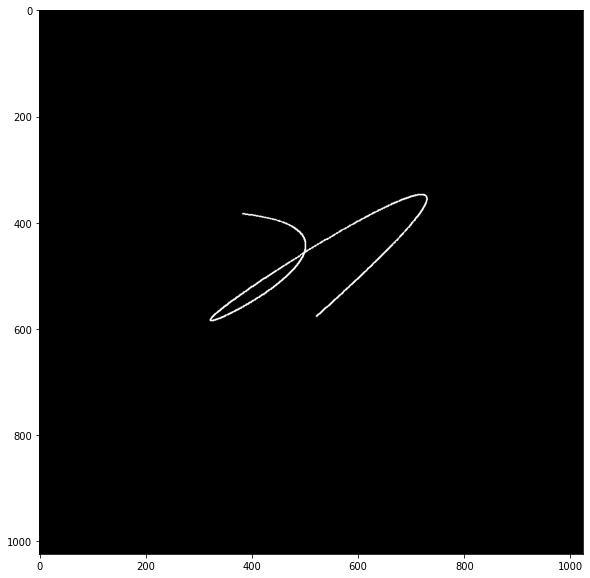

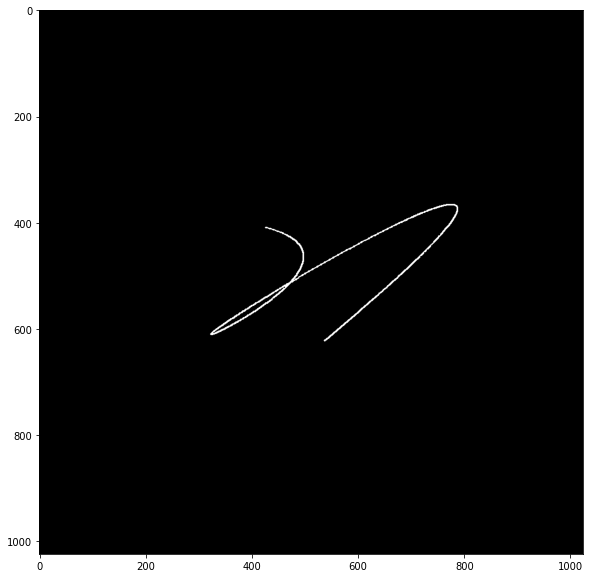

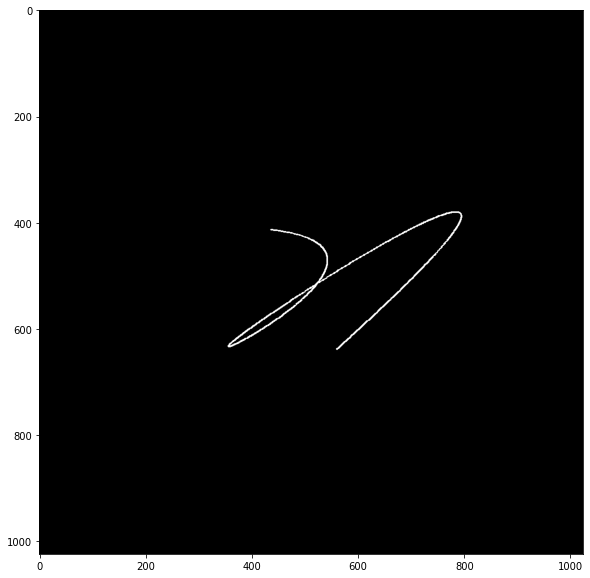

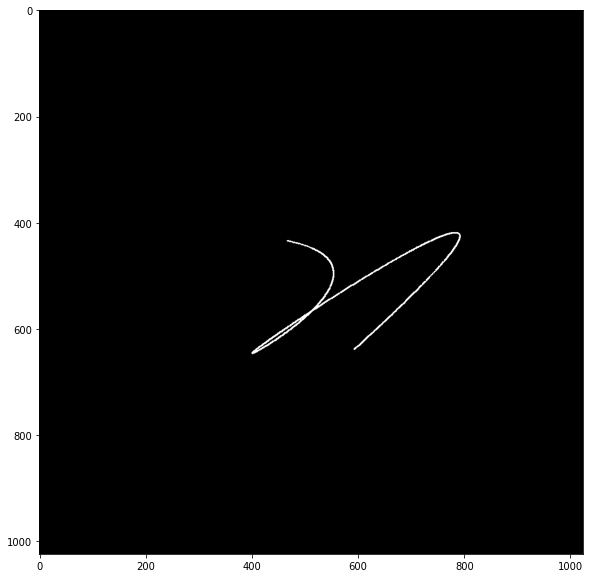

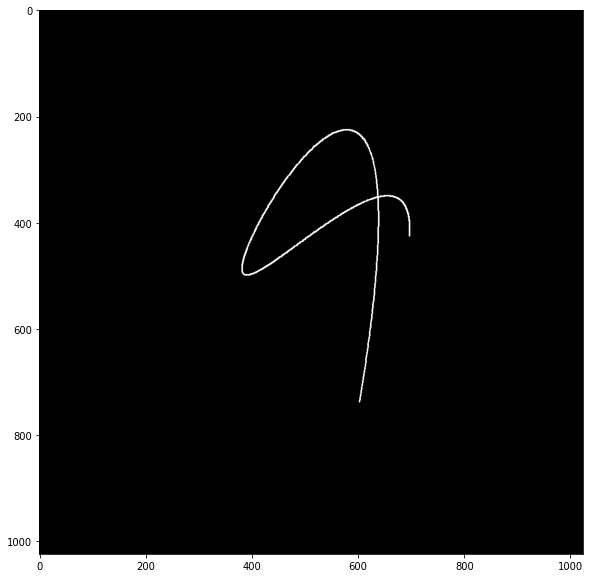

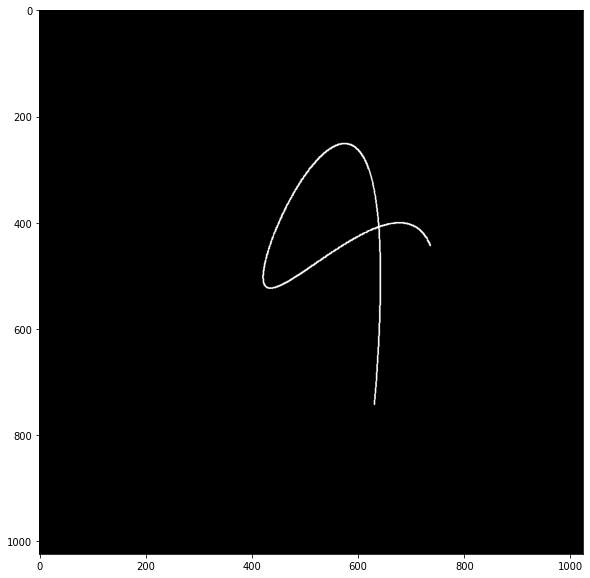

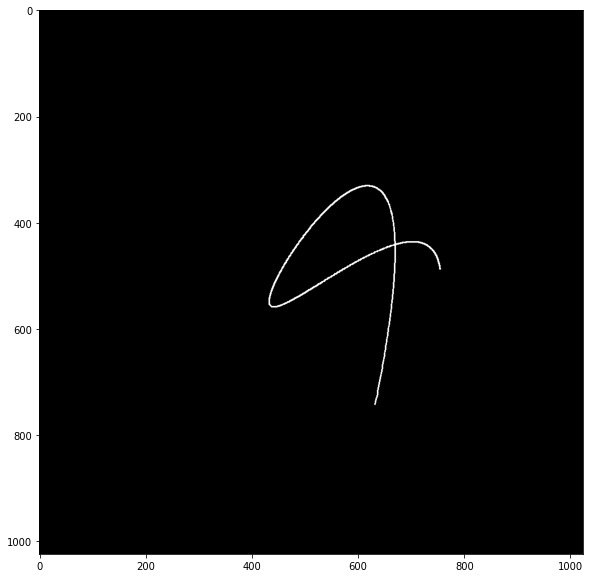

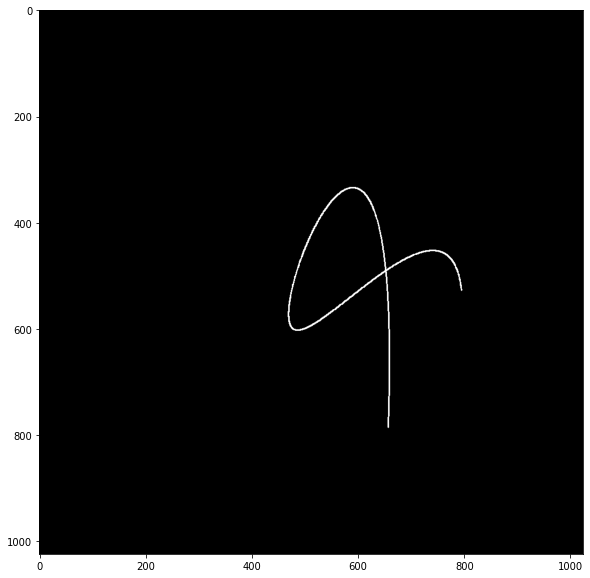

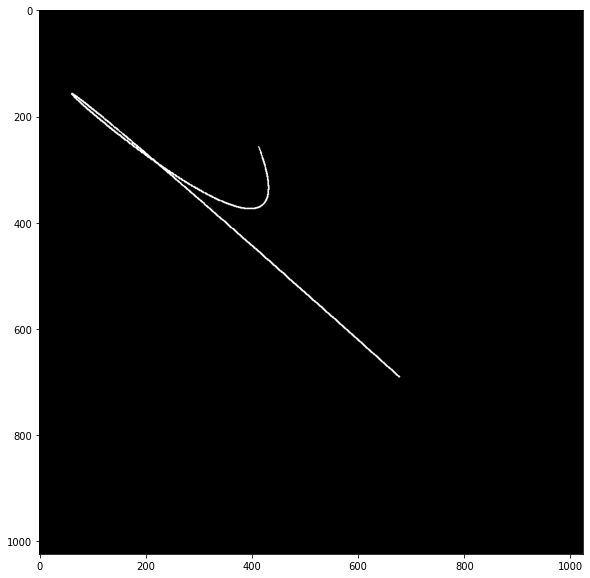

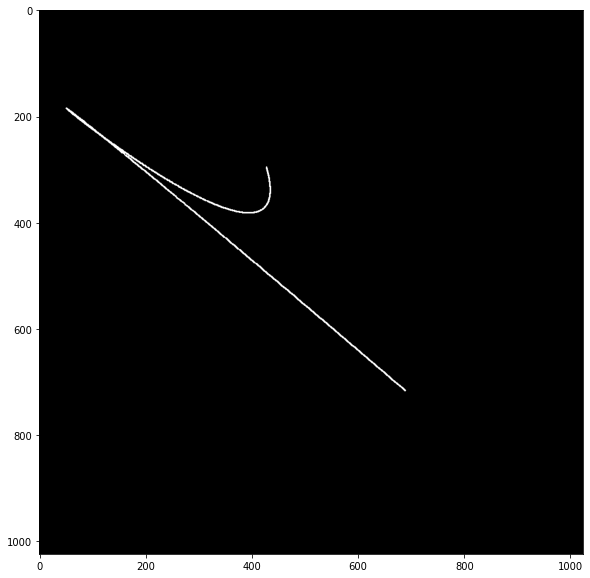

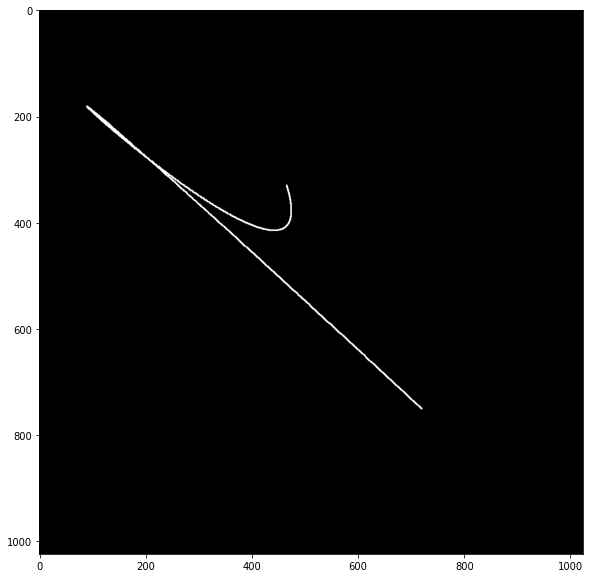

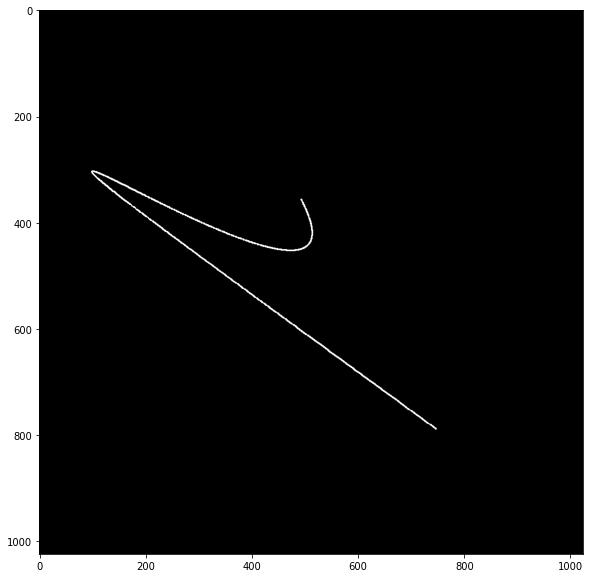

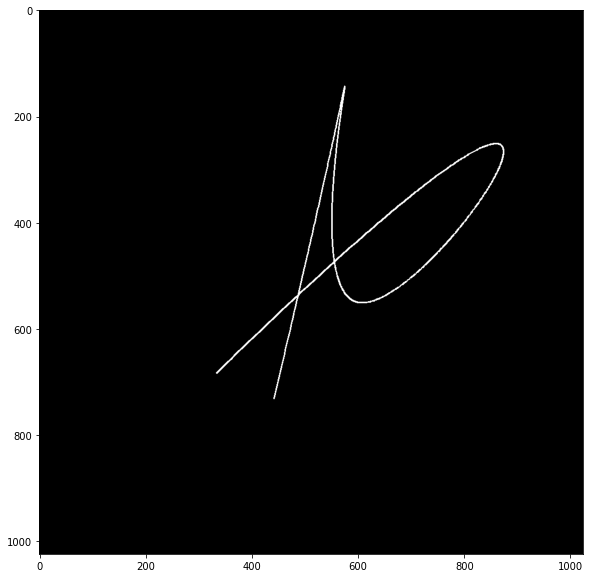

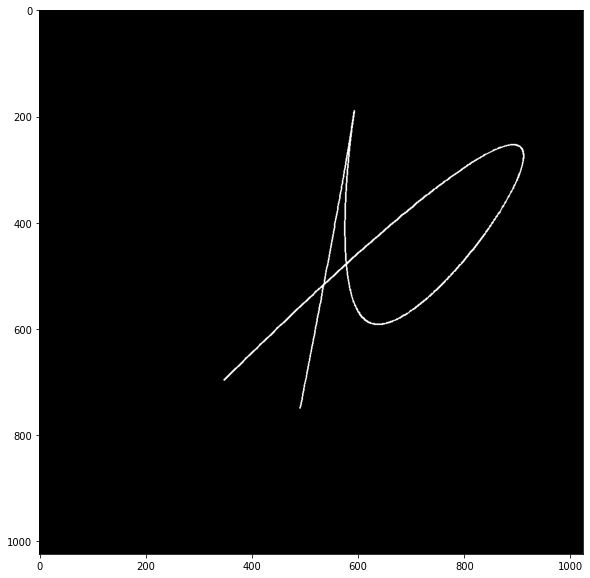

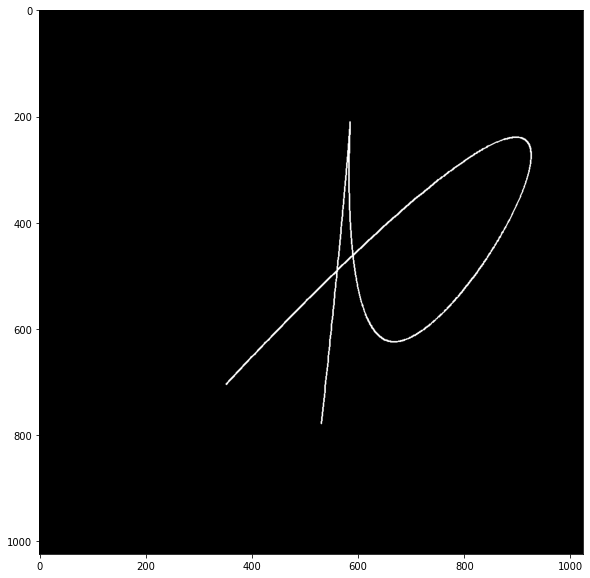

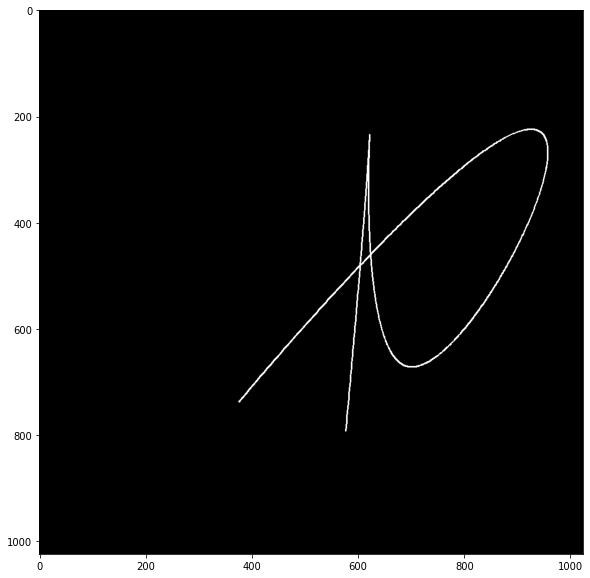

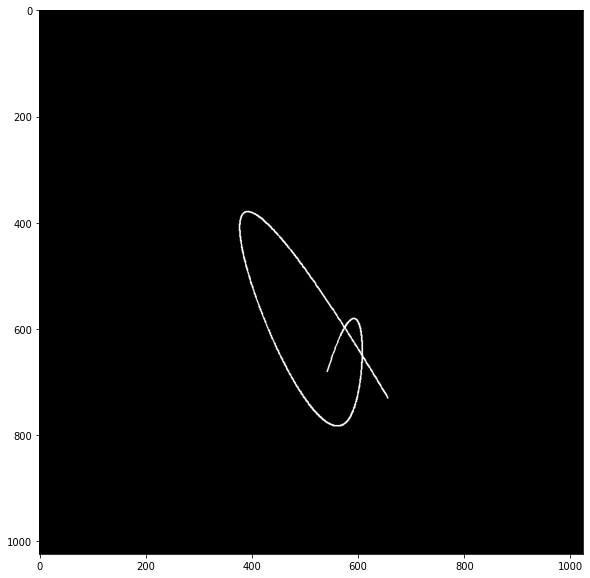

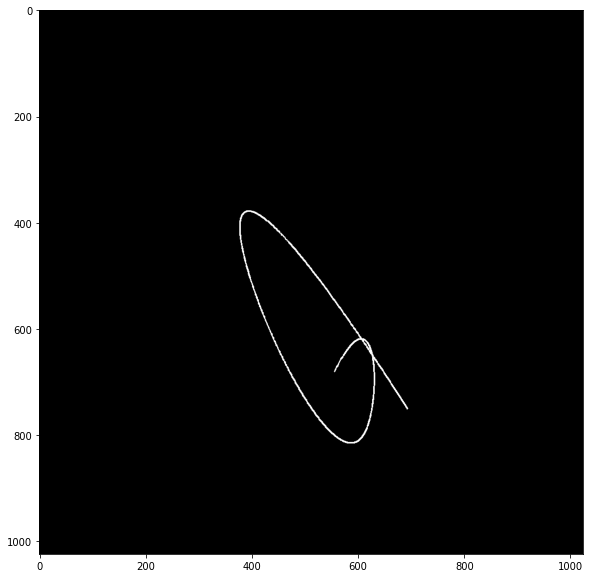

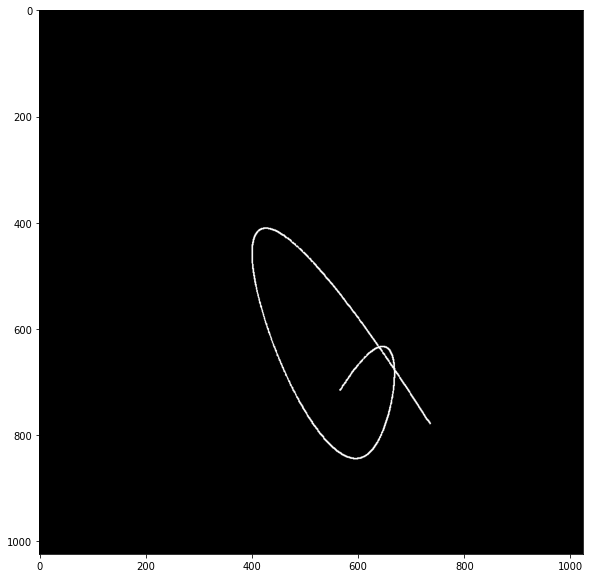

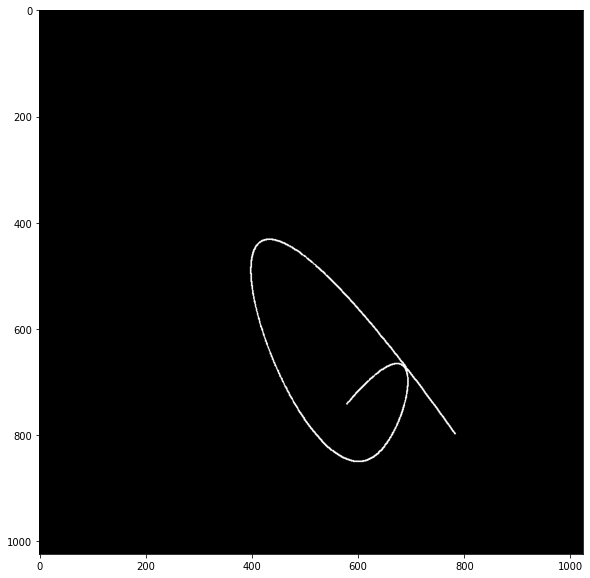

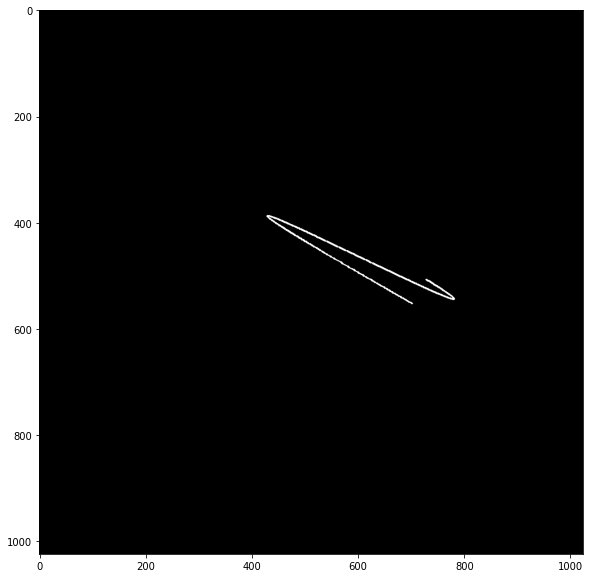

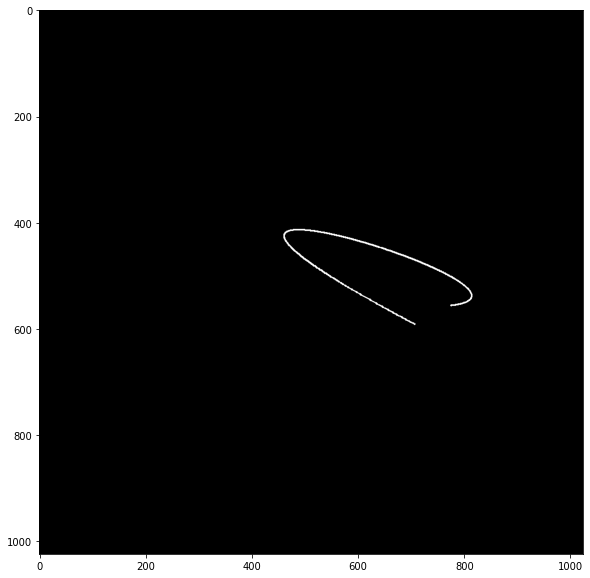

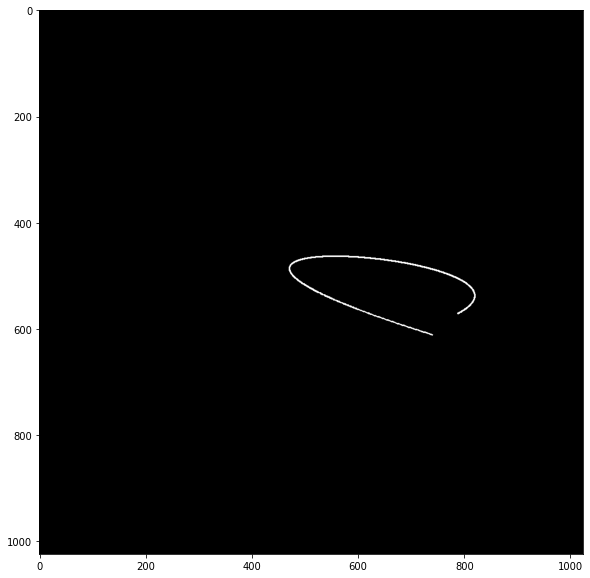

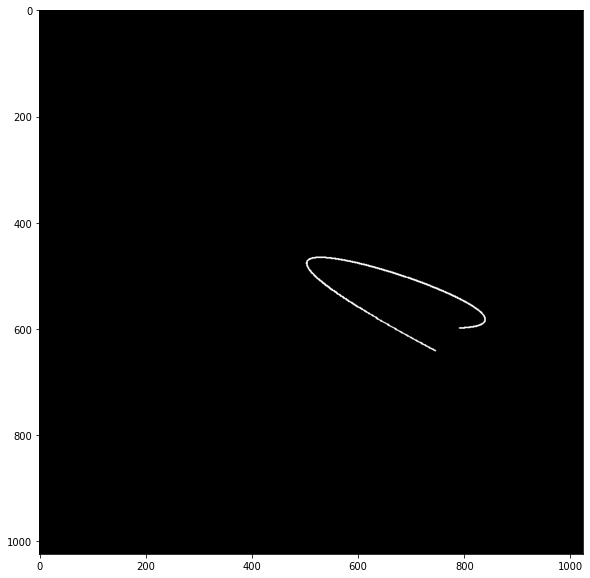

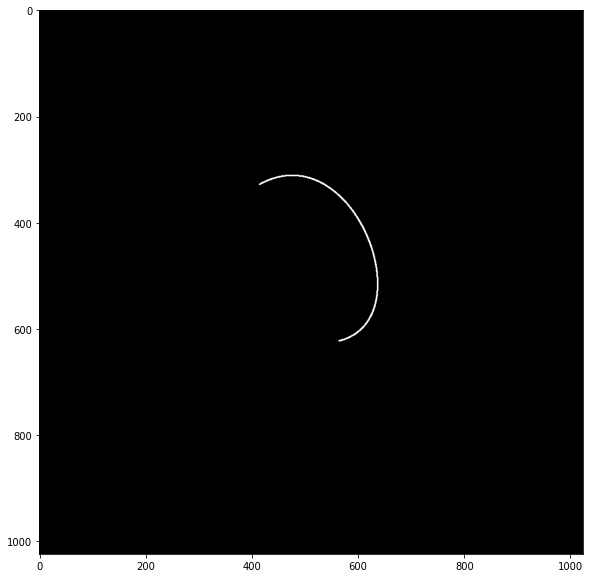

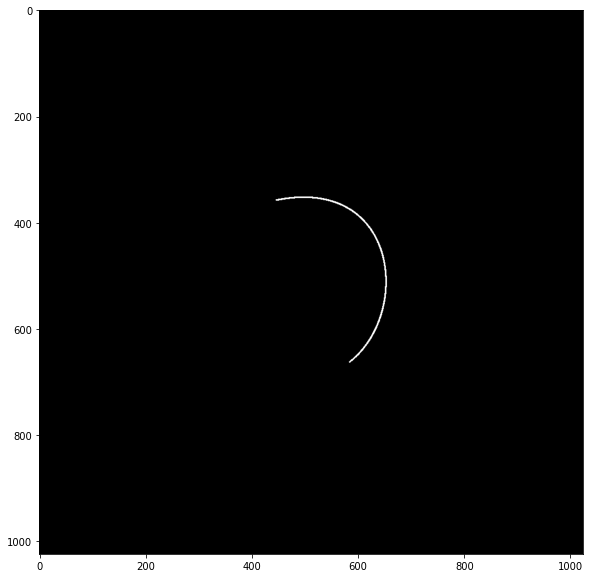

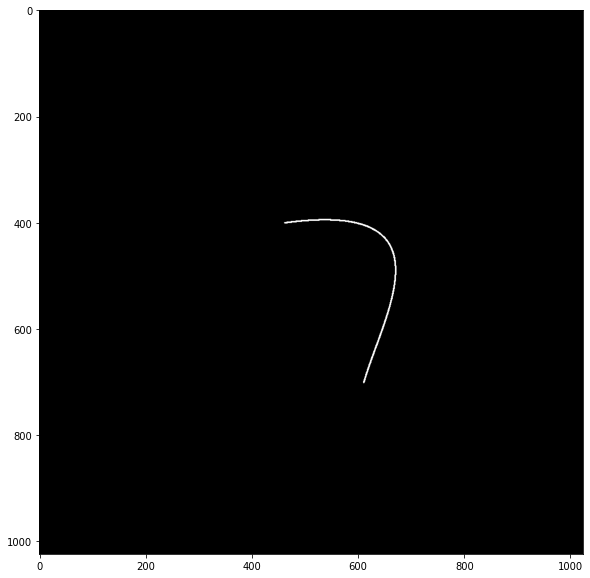

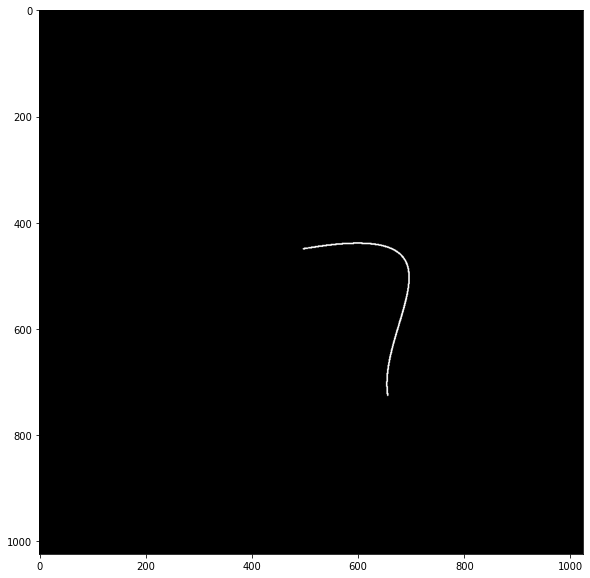

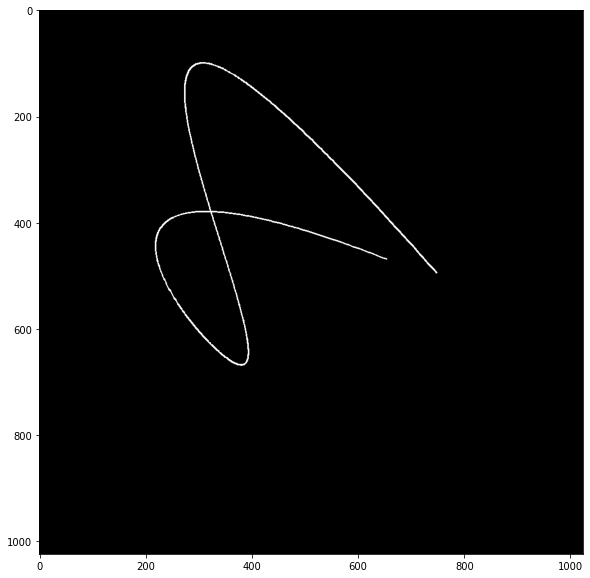

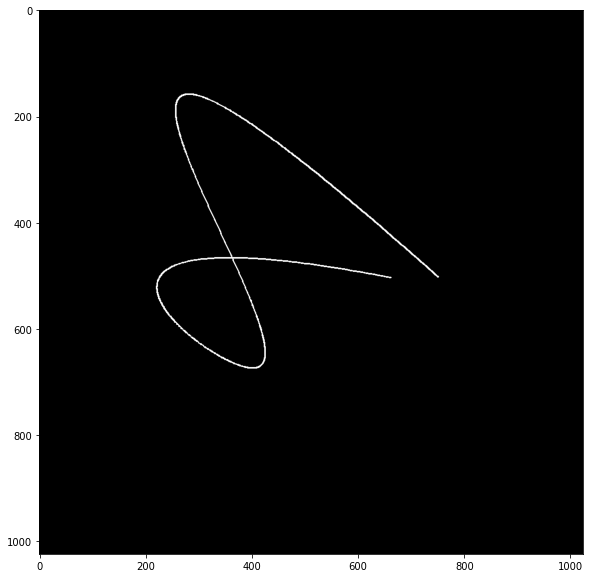

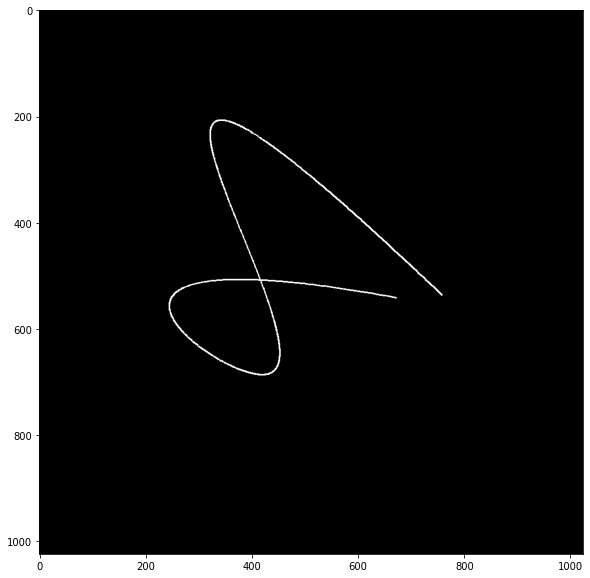

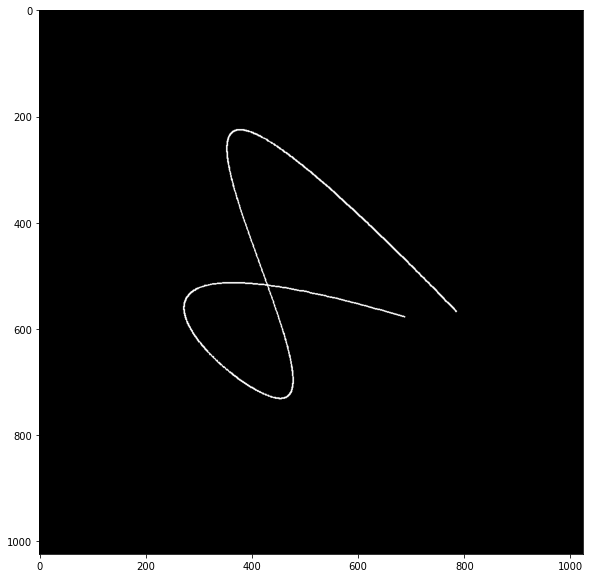

In [28]:

for i in range(len(clines)):
#    i = 0
    xy = None
    img = np.zeros((1024,1024))
    with open(clines[i], 'r') as f:
        for line in f:
            x = float(line.split(' ')[0])
            y = float(line.split(' ')[1])
            if xy is None:
                xy = np.array([[x, y]])
            else:
                #xy = np.stack([xy, np.array([x, y])], axis=0)
                xy = np.concatenate([xy, np.array([[x, y]])], axis=0)

    for j in range(len(xy)-1):
        x1, y1 = xy[j].astype(int)
        x2, y2 = xy[j+1].astype(int)
    #for x, y in xy:
        #img[int(y), int(x)] = 1
        cv2.line(img, (x1,y1), (x2,y2), 1, 2)


    plt.figure(figsize=(10,10))
    plt.imshow(img, cmap='gray')
    plt.show()